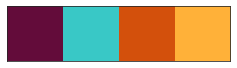

In [1]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [55]:
init_centroids = pd.read_csv('init_cluster_songs_audio_features.csv')

In [2]:
songs = pd.read_csv('english_songs.csv')
songs.columns

Index(['Unnamed: 0', 'artist', 'album', 'track_name', 'acousticness',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [3]:
##Removing song name, artist name etc.
songs_features = songs.copy()
#init_centroids_features = init_centroids.copy()
songs_features = songs_features.drop(['Unnamed: 0','track_name','artist','album','key','mode','instrumentalness','valence','tempo'],axis=1)
#init_centroids_features = init_centroids_features.drop(['Unnamed: 0','track_name','artist','album','key','mode','instrumentalness','valence','tempo'],axis=1)

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
##Normalizing loudness for unannotated dataset
loudness = songs[['loudness']].values
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs_features['loudness_scaled'] = loudness_scaled
'''
tempo = songs[['tempo']].values
tempo_scaled = min_max_scaler.fit_transform(tempo)
songs_features['tempo_scaled'] = tempo_scaled
'''
##Normalizing loudnes for annotated dataset
#loudness = init_centroids[['loudness']].values
#loudness_scaled = min_max_scaler.fit_transform(loudness)
#init_centroids_features['loudness_scaled'] = loudness_scaled
'''
tempo = init_centroids[['tempo']].values
tempo_scaled = min_max_scaler.fit_transform(tempo)
init_centroids_features['tempo_scaled'] = tempo_scaled'''

time_signature = songs[['time_signature']].values
time_scaled = min_max_scaler.fit_transform(time_signature)
songs_features['time_scaled'] = time_scaled

In [8]:
songs_features = songs_features.drop(['time_signature'],axis=1)
#init_centroids_features = init_centroids_features.drop(['loudness'],axis=1)

In [9]:
songs_features.columns

Index(['acousticness', 'danceability', 'energy', 'speechiness', 'liveness',
       'loudness_scaled', 'time_scaled'],
      dtype='object')

In [10]:
len(songs_features)

852

In [11]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,algorithm='elkan')
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)


/Users/akankshabansal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:828: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness_scaled'}>],
       [<AxesSubplot:title={'center':'time_scaled'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

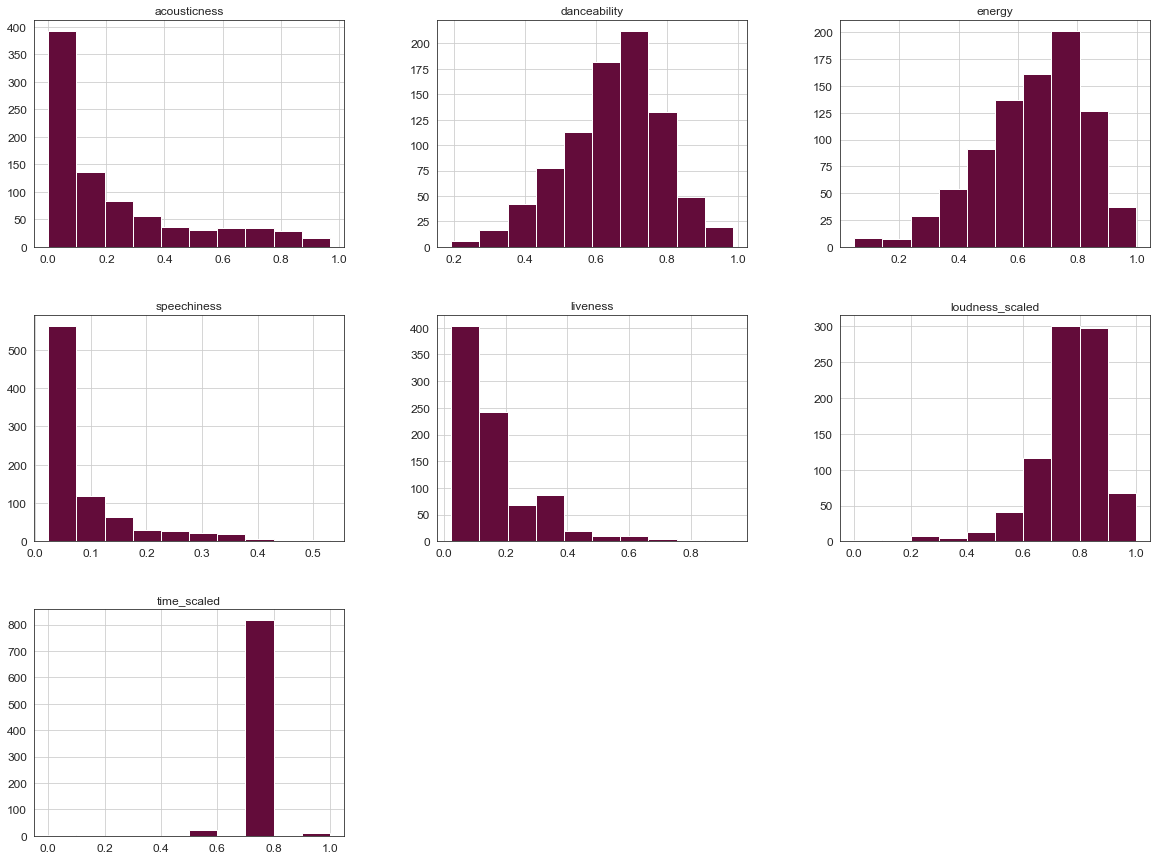

In [12]:
songs_features.hist(bins=10,figsize=(20,15))

In [13]:
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4470528122834091)
For n_clusters = 3, silhouette score is 0.21745693622110585)
For n_clusters = 4, silhouette score is 0.1969353410706192)
For n_clusters = 5, silhouette score is 0.2061595495955335)
For n_clusters = 6, silhouette score is 0.18958096458663962)
For n_clusters = 7, silhouette score is 0.19273445580632376)
For n_clusters = 8, silhouette score is 0.18256952248281932)
For n_clusters = 9, silhouette score is 0.17410969718511174)


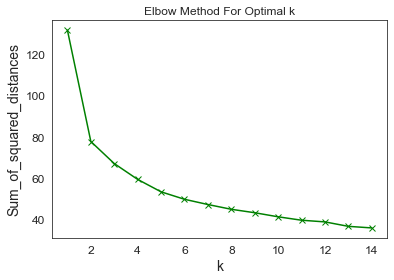

In [14]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
init_centroids_features

,acousticness,danceability,energy,speechiness,liveness,loudness_scaled
0,0.455000,0.302,0.493,0.0451,0.134,1.000000
1,0.031600,0.827,0.737,0.0764,0.211,0.882623
2,0.557000,0.562,0.519,0.0326,0.172,0.000000
3,0.000173,0.603,0.708,0.0379,0.158,0.457906


In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(songs_features)

KMeans(n_clusters=3)

In [17]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

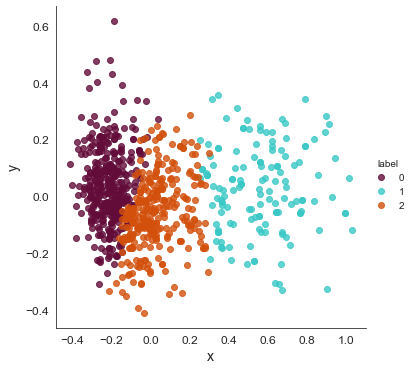

In [18]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [19]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

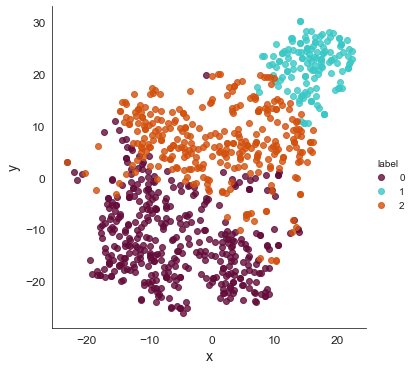

In [20]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [21]:
pca.explained_variance_ratio_

array([0.55464588, 0.13031096])

In [22]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability    energy  speechiness  liveness  \
PC-1      0.814784     -0.073509 -0.490839     0.010110 -0.033632   
PC-2      0.165560     -0.803833  0.260947    -0.085296  0.469462   

      loudness_scaled  time_scaled  
PC-1        -0.296836    -0.021332  
PC-2         0.169179    -0.045368  


In [23]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    401
2    311
1    140
Name: label, dtype: int64

In [24]:
import csv

In [26]:
songs[songs['label'] == 0].tail(109)

,Unnamed: 0,artist,album,track_name,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,label
847,847,Harry Styles,Fine Line,Watermelon Sugar,0.122000,0.548,0.816,0,-4.209,1,0.0465,0.000000,0.335,0.557,95.390,4,0
9,9,OneRepublic,Connection,Connection,0.000837,0.611,0.602,5,-4.890,1,0.0437,0.000000,0.112,0.624,168.154,4,0
614,614,Backstreet Boys,Backstreet's Back,Everybody (Backstreet's Back) - Radio Edit,0.035200,0.731,0.853,10,-4.219,0,0.0363,0.000000,0.268,0.605,108.016,4,0
273,273,OneRepublic,Native,Counting Stars,0.065400,0.664,0.705,1,-4.972,0,0.0382,0.000000,0.115,0.477,122.017,4,0
503,503,NI-NI,Mermaid,Be Together,0.001090,0.550,0.966,11,-7.637,1,0.0359,0.000036,0.293,0.972,136.020,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,410,Ilkay Sencan,Do It,Do It,0.081200,0.795,0.874,1,-3.502,1,0.0506,0.090600,0.065,0.200,108.001,4,0
777,777,Ariana Grande,Sweetener,no tears left to cry,0.040000,0.699,0.713,9,-5.507,0,0.0594,0.000003,0.294,0.354,121.993,4,0
14,14,Dan + Shay,All To Myself,All To Myself,0.230000,0.651,0.782,1,-4.622,1,0.0303,0.000000,0.139,0.619,94.940,4,0
725,725,Zara Larsson,So Good,Never Forget You,0.003120,0.583,0.732,11,-5.728,0,0.0457,0.000010,0.269,0.276,145.992,4,0


In [238]:
label_0.to_csv('indian_songs_label_.csv',encoding='utf-8')

In [27]:
songs[songs['label']==1].head(10)

,Unnamed: 0,artist,album,track_name,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,label
821,821,Kina,Get You The Moon (feat. Snøw),Get You The Moon (feat. Snøw),0.720,0.498,0.235,1,-16.541,0,0.1880,0.000000,0.1440,0.0895,118.917,4,1
789,789,gnash,us,"i hate u, i love u (feat. olivia o'brien)",0.687,0.492,0.275,6,-13.400,0,0.3000,0.000000,0.1010,0.1800,92.600,4,1
808,808,Etham,Before I Lose My Mind (Stripped),Before I Lose My Mind - Stripped,0.608,0.635,0.247,0,-11.141,0,0.0387,0.000000,0.1110,0.1810,124.813,4,1
811,811,Ali Gatie,What If I Told You That I Love You,What If I Told You That I Love You,0.630,0.605,0.365,7,-11.144,1,0.1110,0.000007,0.0554,0.2240,84.628,4,1
683,683,benny blanco,Eastside (with Halsey & Khalid),Eastside (with Halsey & Khalid),0.555,0.560,0.680,6,-7.648,0,0.3210,0.000000,0.1160,0.3190,89.391,4,1
611,611,Isyan Tetick,Patlamaya Devam,Patlamaya Devam,0.644,0.849,0.632,4,-7.206,0,0.3230,0.000000,0.0947,0.6390,101.560,4,1
787,787,Ed Sheeran,x (Deluxe Edition),Photograph,0.607,0.614,0.379,4,-10.480,1,0.0476,0.000464,0.0986,0.2010,107.989,4,1
101,101,JP Saxe,If the World Was Ending (feat. Julia Michaels),If the World Was Ending (feat. Julia Michaels),0.866,0.464,0.473,1,-10.086,1,0.1290,0.000000,0.1090,0.6040,75.801,4,1
92,92,Various Artists,Frozen 2 (Original Motion Picture Soundtrack/D...,The Next Right Thing,0.839,0.296,0.119,0,-14.256,0,0.0475,0.000016,0.3850,0.1460,170.037,4,1
184,184,Madilyn Bailey,Dusk Till Dawn,Dusk Till Dawn,0.815,0.496,0.255,2,-9.181,1,0.0361,0.000000,0.2000,0.3460,88.994,4,1


In [79]:
label_0 = songs[songs['label'] == 0]
label_0.to_csv('km_indian_songs_label_0.csv',encoding='utf-8')

label_1 = songs[songs['label'] == 1]
label_1.to_csv('km_indian_songs_label_1.csv',encoding='utf-8')

label_2 = songs[songs['label'] == 2]
label_2.to_csv('km_indian_songs_label_2.csv',encoding='utf-8')

label_3 = songs[songs['label'] == 3]
label_3.to_csv('km_indian_songs_label_3.csv',encoding='utf-8')

In [28]:
songs[songs['label']==2].head(10)

,Unnamed: 0,artist,album,track_name,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,label
445,445,Selena Gomez,Revelación - EP,Baila Conmigo (with Rauw Alejandro),0.0215,0.823,0.544,5,-7.132,1,0.0715,0.003150,0.0966,0.6640,149.903,4,2
74,74,Various Artists,The Greatest Showman (Original Motion Picture ...,A Million Dreams,0.2430,0.265,0.312,7,-11.689,1,0.0569,0.000000,0.0893,0.0998,54.747,3,2
249,249,SLANDER,Love Is Gone,Love Is Gone,0.0589,0.452,0.465,4,-10.006,0,0.0344,0.000524,0.0950,0.0832,149.586,4,2
23,23,Martin Garrix,High On Life (feat. Bonn),High On Life (feat. Bonn),0.0129,0.414,0.486,6,-6.431,0,0.0311,0.000000,0.1110,0.3680,128.038,4,2
796,796,ZAYN,I Don’t Wanna Live Forever (Fifty Shades Darker),I Don’t Wanna Live Forever (Fifty Shades Darke...,0.0631,0.735,0.451,0,-8.374,1,0.0585,0.000013,0.3250,0.0862,117.973,4,2
263,263,Ramz,Barking,Barking,0.1850,0.450,0.465,7,-7.867,0,0.2680,0.000000,0.0782,0.7880,70.231,3,2
219,219,ZAYN,Dusk Till Dawn (Radio Edit),Dusk Till Dawn - Radio Edit,0.1010,0.258,0.437,11,-6.593,0,0.0390,0.000001,0.1060,0.0967,180.043,4,2
675,675,Zara Larsson,Ruin My Life,Ruin My Life,0.4230,0.665,0.699,11,-5.265,1,0.0578,0.000000,0.0969,0.5850,124.896,4,2
622,622,Cardi B,WAP (feat. Megan Thee Stallion),WAP (feat. Megan Thee Stallion),0.0194,0.935,0.454,1,-7.509,1,0.3750,0.000000,0.0824,0.3570,133.073,4,2
500,500,Ed Sheeran,No.6 Collaborations Project,South of the Border (feat. Camila Cabello & Ca...,0.1480,0.857,0.621,9,-6.376,0,0.0825,0.000000,0.0865,0.6680,97.989,4,2


In [29]:
songs[songs['label']==3].head(10)

,Unnamed: 0,artist,album,track_name,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,label
118,118,Armaan Malik,Bollywood Romantic Songs With Armaan Malik,Wajah Tum Ho,0.3420,0.600,0.684,5,-6.179,0,0.0257,0.000015,0.1150,0.241,103.951,3
53,53,Various Artists,Kapoor & Sons (Since 1921) (Original Motion Pi...,Kar Gayi Chull,0.0316,0.827,0.737,11,-5.473,0,0.0764,0.000322,0.2110,0.873,121.990,3
80,80,Badshah,"Garmi (From ""Street Dancer 3D"")","Garmi (From ""Street Dancer 3D"") (feat. Varun D...",0.1230,0.788,0.870,9,-5.217,1,0.1770,0.000014,0.0692,0.884,109.974,3
297,297,Rochak Kohli,Yeh Saari Baat,Yeh Saari Baat,0.0285,0.679,0.490,6,-10.008,1,0.0320,0.000006,0.0946,0.545,98.998,3
92,92,Various Artists,Hindi Medium,Suit Suit,0.1400,0.767,0.869,2,-3.381,0,0.0908,0.000000,0.2210,0.751,98.208,3
6,6,Himesh Reshammiya,Bodyguard,I Love You,0.3590,0.654,0.671,11,-6.026,1,0.0807,0.000007,0.0656,0.760,90.063,3
86,86,Vishal Mishra,Notebook,Safar,0.3820,0.226,0.636,9,-6.662,1,0.0436,0.000000,0.3260,0.423,77.918,3
55,55,Pritam,Ae Dil Hai Mushkil (Original Motion Picture So...,Channa Mereya,0.2370,0.476,0.788,9,-4.821,0,0.0446,0.000025,0.1060,0.746,90.066,3
274,274,Gajendra Verma,Mera Jahan,Mera Jahan,0.0974,0.741,0.582,4,-7.590,0,0.0311,0.000000,0.1600,0.261,112.940,3
373,373,A.R. Rahman,Tamasha,Heer Toh Badi Sad Hai,0.1070,0.606,0.913,7,-4.976,1,0.0577,0.000012,0.0993,0.881,90.998,3
